In [176]:
#Import Statements
import numpy as np
import pandas as pd
import time
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt


## Data Exploration

In [177]:
#Importing the dataset
df = pd.read_csv('diabetic_data.csv')

print(df.shape)
df.head(10)


(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


From printing this dataset, we can see that there are 101,766 rows/entries, and 50 columns. There are some text variables here that need to be encoded, and there are also some entries with a "?" representing a missing value.

In [178]:


df["readmitted"].value_counts()


NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

Counting the number of people who have been readmitted to the hospital. In this dataset, 54, 864 people were not readmitted at all, 35,545 people were readmitted after 30 days, and 11,357 people were readmitted to the hospital within 30 days of their initial visit.

(101766, 50)


In [180]:
#Check for duplicate rows in the dataset

df = df.drop_duplicates()
print(df.shape)



for column in df.columns:
    print(column, df[column][df[column] == '?'].count())


encounter_id 0
patient_nbr 0
race 2273
gender 0
age 0
weight 98569
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
payer_code 40256
medical_specialty 49949
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 21
diag_2 358
diag_3 1423
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


Here I check for duplicate rows in the dataset, and count the number of missing entries in each column of the dataset. A missing entry is represented as a "?". We can see that there are many missing values in the medical_specialty, race, and weight columns.

In [181]:

print(df.dtypes.value_counts())

object    37
int64     13
dtype: int64


Finding the number of categorical variables in the dataset. Each of the variables that is not of type int64 is a variable that needs to be encoded into a value that can be read by the machine, so the number of categorical variables is found by counting the number of variables with object datatypes. From this print statement, we can see that there are 37 categorical variables.

## Pre-processing

In [182]:
#Replacing any missing value in the dataset with NaN
df.replace('?', np.nan, inplace = True)


#Any row that has a NaN value is dropped from the dataset entirely. 
df= df.dropna()
print(df.shape)

#Printing dataframe to see all features and their values to see what needs to be encoded
df.head(5).T



(1043, 50)


,27068,27128,27147,27186,27236
encounter_id,88792836,88986678,89032962,89191392,89277516
patient_nbr,100654011,58682736,69250302,62022042,30950811
race,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Male,Male,Male,Male
age,[70-80),[80-90),[60-70),[40-50),[50-60)
weight,[75-100),[50-75),[100-125),[75-100),[100-125)
admission_type_id,3,1,1,1,3
discharge_disposition_id,3,11,1,3,1
admission_source_id,1,5,7,7,1
time_in_hospital,10,6,2,3,2


The first step of preprocessing for this dataset is to deal with the missing values in the dataset. First, any missing value, or any ? value in the dataset is replaced with NaN(not a number). Then, we use the pandas function to drop any rows with nan values in the dataset. This helps to trim down the large size of the dataset to something more manageable for this projects scope while also still maintaining enough data for the machine learning models.

In [183]:


print(df.weight.unique())
print(df.age.unique())

df['weight'] = df['weight'].map({'[0-25)':12,'[25-50)':37, '[50-75)':62,'[75-100)':87,'[100-125)':112,'[125-150)':137,'[150-175)':162,'[175-200)':187})

df['age'] = df['age'].map({'[0-10)':5,'[10-20)':15, '[20-30)':25,'[30-40)':35,'[40-50)':45,'[50-60)':55,'[60-70)':65,'[70-80)':75,'[80-90)':85,'[90-100)':95})

df.head(5)



['[75-100)' '[50-75)' '[100-125)' '[125-150)' '[25-50)' '[150-175)'
 '[175-200)' '[0-25)']
['[70-80)' '[80-90)' '[60-70)' '[40-50)' '[50-60)' '[90-100)' '[20-30)'
 '[30-40)' '[0-10)' '[10-20)']


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
27068,88792836,100654011,Caucasian,Female,75,87,3,3,1,10,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
27128,88986678,58682736,Caucasian,Male,85,62,1,11,5,6,...,No,Steady,No,No,No,No,No,No,Yes,NO
27147,89032962,69250302,Caucasian,Male,65,112,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,>30
27186,89191392,62022042,Caucasian,Male,45,87,1,3,7,3,...,No,No,No,No,No,No,No,No,Yes,>30
27236,89277516,30950811,Caucasian,Male,55,112,3,1,1,2,...,No,No,No,No,No,No,No,No,Yes,>30


The age and weight variables have age ranges, so to make it easier for us to use this information, we take the ranges and replace them with an integer. Each age range is by an increment of 10, so we will take the middle of each range for simplicity. For weight, where the range is 25, we will use the 12th value.(EX: 70-80->75, 50-75->62)

In [184]:


labelencoder = LabelEncoder()

#Gender:Male = 0, Female = 1
print(df.gender.unique())
df['gender'] = df['gender'].replace('Male', 0)
df['gender'] = df['gender'].replace('Female', 1)

#Race: One hot encoding because there are several possible values, one hot encoding with get_dummies function, concatening new cols and dropping old col
#print(df.race.unique())
dummies = pd.get_dummies(df['race'])
df = pd.concat([df, dummies], axis = 1)
df.drop(['race'],inplace=True,axis=1)

#Change:(if patient changed their diabetes medication): X 
print(df.change.unique())
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)

#diabetesMed(if patient was prescribed diabetic medication)
print(df.diabetesMed.unique())
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)

#medical_specialty:specialty of admitting pyhsician, lots of different values so use pandas labelencoder for label encoding
print(df.medical_specialty.unique())
df['medical_specialty'] = labelencoder.fit_transform(df['medical_specialty'])

#payer code
print(df.payer_code.unique())
df['payer_code'] = labelencoder.fit_transform(df['payer_code'])

#max_glu_serum: range of result of glucose serum test
df["max_glu_serum"] = df["max_glu_serum"].replace({">200":2,">300":2,"Norm":1,"None":0})

#A1Cresult: range of result of glucose serum test
df["A1Cresult"] = df["A1Cresult"].replace({">7":2,">8":2, "Norm":1, "None":0})

#23 medications, whether drug was prescribed, more/less/same amt, or none
medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide','examide','citoglipton']
for col in medications:
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)
    df[col] = df[col].replace('No', 0)

#These variables have some text data, so encode them
diag = ['diag_1','diag_2','diag_3']
for d in diag:
    df[d] = pd.Categorical(df[d]).codes
    
#readmitted: NO:0, <30:1, >30:2
df['readmitted'] = df['readmitted'].replace('NO',0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('>30', 1)




['Female' 'Male']
['Ch' 'No']
['Yes' 'No']
['Surgery-General' 'Family/GeneralPractice' 'Cardiology' 'Psychiatry'
 'InternalMedicine' 'ObstetricsandGynecology' 'Dentistry' 'Pediatrics']
['UN' 'CP' 'DM' 'BC' 'MC' 'HM' 'OT' 'MD' 'CM' 'SP' 'WC']


In this cell I am encoding the variables using label encoding and one hot encoding. Each categorical variable in this dataset has a certain number of possible values, so assigning a unique number per possible value will make it possible for those variables to be used in the machine learning process. One hot encoding is used for features that have more attributes, while label encoding is used for features with less attributes.

In [185]:


dfLabels = pd.DataFrame(df['readmitted'])

#Clustering is unsupervised, drop class labels
df.drop(['readmitted'],axis=1)



,encounter_id,patient_nbr,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,AfricanAmerican,Asian,Caucasian,Other
27068,88792836,100654011,1,75,87,3,3,1,10,9,...,0,0,0,0,1,1,0,0,1,0
27128,88986678,58682736,0,85,62,1,11,5,6,9,...,0,0,0,0,0,1,0,0,1,0
27147,89032962,69250302,0,65,112,1,1,7,2,2,...,0,0,0,0,0,1,0,0,1,0
27186,89191392,62022042,0,45,87,1,3,7,3,3,...,0,0,0,0,0,1,0,0,1,0
27236,89277516,30950811,0,55,112,3,1,1,2,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101238,436721264,123812618,0,75,87,1,1,7,1,5,...,0,0,0,0,0,1,1,0,0,0
101330,437928656,117516146,0,35,112,1,1,7,4,6,...,0,0,0,0,0,0,0,0,1,0
101340,437959022,8420319,0,65,112,1,1,7,3,5,...,0,0,0,0,0,1,0,0,1,0
101449,439577312,97708986,1,75,62,1,3,7,13,9,...,0,0,0,0,1,1,0,0,1,0


Because I plan on doing clustering in this dataset, I will need to drop the class labels from the dataset because clustering is an unsupervised machine learning technique, meaning it groups samples together without prior knowledge of what the data represents, in this case being whether a sample represents a patient that has been readmitted to a hospital, or a patient that was not readmitted to a hospital.

I do not engage in feature extraction and feature learning for this dataset. After I have processed the data, the raw features are enough to begin modeling. The data is already numerical and there are a small number of features, meaning that using dimensionality techniques like PCA would not be necessary here. 

## Dataset Processing

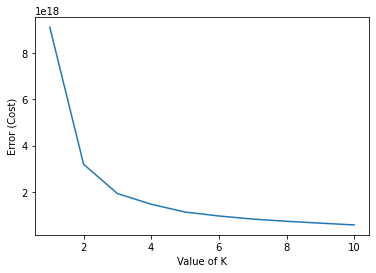

In [195]:
#First Method: K-means clustering

#Paremeter Tuning with elbow method for k means clustering
cost = []

for i in range(1,11):
    #random state takes int as seed to use for random generation of centroid clusters
    KM = KMeans(n_clusters = i, max_iter = 1000,random_state=1)
    KM.fit(df)

    #Cakculate error
    cost.append(KM.inertia_)

plt.plot(range(1, 11), cost) 
plt.xlabel("Value of K") 
plt.ylabel("Error (Cost)") 
plt.show()

#From this graph the elbow is k = 2, that is where the graph "bends"(from ground truth labels, we know that there are 2 diff labels as well:readmitted to hospital or not)




The first method I am using for this dataset is K-means clustering. I am choosing to use this method because it is a general use method that works well in most clustering problems and it will be very fast especially given the relatively small number of samples in this dataset that I have after preprocessing. I use the KMeans function in sklearn here, but the algorithm works by first assigning the given samples randomly to the given number of clusters, which must be determined by parameter tuning. Once this has been determined, the centroid of each cluster is calculated, which is the sum of the means of the data points in the cluster. Then, the euclidean distance from two of the centroids to a given data point are calculated. If it is closer to the centroid of the cluster that the point does not currently belong to, then the cluster membership of that point will change. This process will repeat for every sample until the samples stop changing their cluster membership, meaning they have been settled into their final clusters.

In order to tune the number clusters to run the K Means function with, I use the elbow method. This method looks at where there is a sharpe decrease in error as the number of clusters K increases. The error vs value of K is plotted, and this "sharp decrease" begins at k = 2, where the graph forms a sort of elbow. This is the value we should use for k. The error, or inertia_, is calculated for each value of k. This is the sum of squared distances(euclidean distance squared) of the cluster centroid that each sample is closest to.

In [194]:
#K Means clustering with k = 2

KMeansTime = 0

startTime = time.time()

KM = KMeans(n_clusters = 2, max_iter=1000,random_state=1)
KM.fit(df)

#print(KM.cluster_centers_.shape)
#print(KM.labels_)

KMeansTime += time.time() - startTime

KMeansScore = silhouette_score(df,KM.labels_)
print(KMeansScore)


(2, 53)
[0 0 0 ... 1 1 1]
0.5921745965147064


Once we find the number of clusters to use, we run the KMeans function again on the dataset, and then measure its accuracy with the silhouette score. This is done with the silhouette_score function which takes in the dataset itself and the generated labels of each point that correspond to the cluster that the data points have been placed in. The silhouette score is calculated by subtracting for all samples the average distance between each point per cluster from the average distance between each cluster all divided by the max of these two values. The resulting value will be a number ranging from -1 to 1, where the closer to 1 means that the clusters are farther apart from each other and there is a clear variation between the clusters. This score can be used to judge how well the clustering methods that I choose for this dataset work at identifying which samples result in hospital readmissions or not.

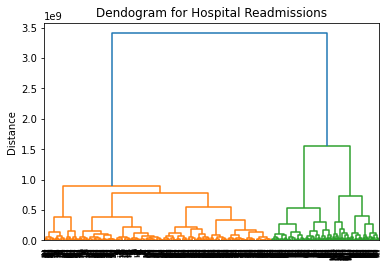

In [188]:
#Second method: Hierarchical Clustering

#Plot dendrogram to see number of clusters needed

#linkage takes the dataset and does agglomerative clustering with ward linkage
plt.figure()
plt.title("Dendogram for Hospital Readmissions")
plt.ylabel("Distance")
dend = shc.dendrogram(shc.linkage(df, method='ward'))


#Draw horizontal line through highest distance without a horizontal line intersecting, the number of vertical intersections is the number of clusters to use. In this case, around y=1.75, and there would be 2 clusters

The second method I am using for this dataset is Hierarchical clustering, using agglomerative clustering to connect the cluster groups together. I chose this method of clustering because of a relatively small number of samples and features, which would work well with this method since the less number of samples means that the result of hierarchical clustering will be more accurate and faster as well. Hierarchical clustering works by using a bottom up method to group clusters that are close to each other in terms of distance, which in this case is the euclidean distance. Every data point starts out as its own cluster, then based on the euclidean distance metric, every cluster looks at its closest other cluster, and they join together to make one cluster. This process repeats until there is one cluster left.

The dendogram shows how clusters get connected to each other, as well as the measure of euclidean distance between points, represented by the height of the graph. This dendogram makes it easier to see which specific clusters are joining together, and what the final number of clusters should be when running the clustering algorithm. So, the purpose of using this dendogram here is to do parameter tuning for the number of clusterings in the agglomerative clustering algorithm, which is the bottom up approach described earlier. The number of clusters to use in the algorithm can be determined from the dendogram, where we can see that there are 2 main cluster groups in the end that are grouped, so we can say the number of clusters to use is 2.

To make the dendogram, I use functions from scipy. The linkage function performs agglomerative clustering and the dendogram function will plot the result of that clustering. The ward method is how the clusters get grouped together, where it finds the minimun squared distance for each sample in a cluster. This is how the algorithm determines which clusters/samples to group together.

In [189]:
#Now use sklearn agglomerativeclustering to group data points into clusters

HierarchicalTime = 0

Hierarchical = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
HLabels = Hierarchical.fit_predict(df)

HierarchicalScore = silhouette_score(df,HLabels)
print(HierarchicalScore)

HierarchicalTime += time.time() - startTime



0.570105669265605


Now that the number of clusters has been determined, I use sklearns agglomerative clustering function to fit the data to its clusters. Uses euclidean distance metric with ward linkage to group the different clusters. 

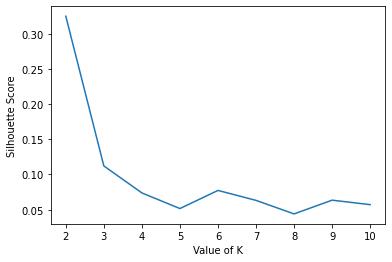

In [190]:
#Third Method: Gaussian Mixture Model-EM Based Clustering


#standardize data in order to use Gaussian, standardscaler normalizes dataset to have 0 mean and unit variance
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_std))


#Parameter tuning for GMM based on silhouette score:
cost = []
for i in range(2,11):
    GMM = GaussianMixture(n_components = i,max_iter=1000)
    GMM.fit(df_std)
    GMMLabels = GMM.predict(df_std)
    cost.append(silhouette_score(df_std,GMMLabels))

plt.plot(range(2, 11), cost) 
plt.xlabel("Value of K") 
plt.ylabel("Silhouette Score") 
plt.show()

#best n components is 2, it gives highest silhouette score

 


The third clustering dataset I have chosen for this dataset is EM based clustering where the data comes from a Gaussian Mixture Model. I chose this method because since my data is all numerical features after preprocessing, it would be simple to standardize the dataset with the StandardScaler function in sklearn in order to make the data follow a Gaussian distribution. I implement this with the GaussianMixture function in sklearn. From the dataset, the Gaussian Mixture Model will be generated from taking the means and variances of the dataset, which already follow a Gaussian distribution after preprocessing the data. Once the data has been generated, the Expectation Maximization(EM) algorithm is applied to the data. First, the data is randomly assigned to k clusters like in K means clustering, being assigned a latent variable that represents the samples cluster membership. Then, the probability of each sample belonging to their respective clusters is calculated with Bayes Formula. The calculated probability for each cluster is used to determine if cluster membership needs to be changed to a different cluster. The sample will change cluster membership to the cluster where the probability is the largest. This process will continue until there are no more significant changes in membership.

To tune the number of components, I am comparing the silhouette scores of different possible k values. From the graph above, we can see that the highest silhouette score occurs at k = 2.


In [191]:
#Best n_components parameter is 2

GMMTime = 0

GMM = GaussianMixture(n_components = 2, max_iter = 1000)
GMM.fit(df_std)
GMMLabels = GMM.predict(df_std)

GMMScore = silhouette_score(df_std,GMMLabels)
print(GMMScore)

GMMTime += time.time() - startTime



0.32484937193032243


Once the n_components parameter has been tuned, I run the GMM function again on the data with the newly chosen parameter and then find its silhouette score 

## Comparative Analysis

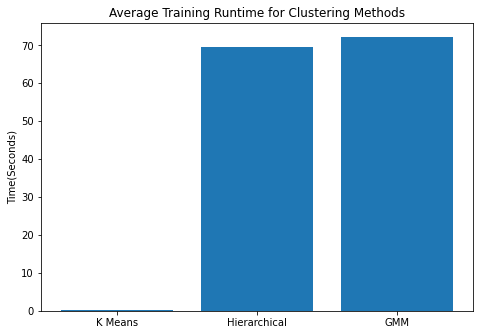

In [192]:
#Plot of average training runtime for each method

plot = plt.figure()
xlabels=['K Means','Hierarchical','GMM']
values = [KMeansTime,HierarchicalTime,GMMTime]
fig = plot.add_axes([0,0,1,1])
fig.bar(xlabels,values)
plt.title('Average Training Runtime for Clustering Methods')
plt.ylabel('Time(Seconds)')
plt.show()

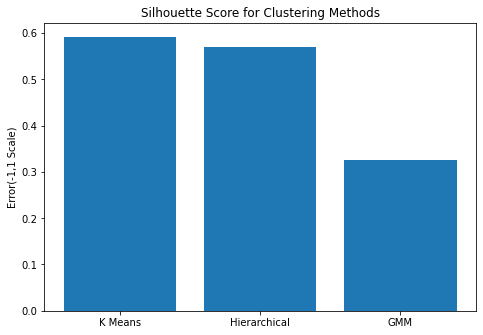

In [193]:
#Plot of average error for each method

plot = plt.figure()
xlabels=['K Means','Hierarchical','GMM']
values = [KMeansScore,HierarchicalScore,GMMScore]
fig = plot.add_axes([0,0,1,1])
fig.bar(xlabels,values)
plt.title('Silhouette Score for Clustering Methods')
plt.ylabel('Error(-1,1 Scale)')
plt.show()

Based on the silhouette score and runtime plots, we can see that K means performs the best overall. It has a much faster runtime, and a higher silhouette score than both of the other two models, so it is the best pick for production of this dataset. 

## Ethical Issues

The ethical issues in this dataset lie in the fact that this data represents patient's data and medical records. This information including age,weight, race, and types of medications they are taking to treat certain diseases is very personal to certain people and they may not want their data available to the public. Also, this is a machine learning model making the prediction that a person will be readmitted or not, which at the end of the day is a decision best made by doctors and other medical professionals.

## Bibliography

E, Akshaya, et al. “How to Count Distinct Values of a Pandas Dataframe Column?” GeeksforGeeks, 19 Aug. 2020, www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/. 

“Pandas.get_dummies.” Pandas.get_dummies - Pandas 1.1.5 Documentation, 2008, pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html. 

Pedregosa, Fabian, et al. “Scikit-Learn: Machine Learning in Python.” Journal of Machine Learning Research, 1 Jan. 2011, jmlr.csail.mit.edu/papers/v12/pedregosa11a.html. 

Sinha, Praveen. “ML: Determine the Optimal Value of K in K-Means Clustering.” GeeksforGeeks, 26 Jan. 2019, www.geeksforgeeks.org/ml-determine-the-optimal-value-of-k-in-k-means-clustering/. 
